# Setting Up the Environment

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt

# env = gym.make('FrozenLake-v1')
env = gym.make("FrozenLake-v1", is_slippery=False, render_mode="human", map_name="4x4")


# Implementing Value Iteration

In [13]:
def value_iteration(env, gamma=1.0):
    value_table = np.zeros(env.observation_space.n)
    no_of_iterations = 10000
    threshold = 1e-20
    diffs = []  # To track the sum of absolute differences at each iteration
    
    for i in range(no_of_iterations):
        updated_value_table = np.copy(value_table)
        for state in range(env.observation_space.n):
            Q_value = []
            for action in range(env.action_space.n):
                next_states_rewards = []
                for next_sr in env.P[state][action]:
                    trans_prob, next_state, reward_prob, _ = next_sr
                    next_states_rewards.append((trans_prob * (reward_prob + gamma * updated_value_table[next_state])))
                Q_value.append(np.sum(next_states_rewards))
            value_table[state] = max(Q_value)
        
        diff = np.sum(np.fabs(updated_value_table - value_table))
        diffs.append(diff)
        
        if diff <= threshold:
            print(f'Value-iteration converged at iteration# {i+1}.')
            break
    
    return value_table, diffs

optimal_value_function, convergence_diffs = value_iteration(env=env, gamma=1.0)

Value-iteration converged at iteration# 1373.


# Extracting the Optimal Policy

In [14]:
def extract_policy(value_table, gamma=1.0):
    policy = np.zeros(env.observation_space.n)
    for state in range(env.observation_space.n):
        Q_table = np.zeros(env.action_space.n)
        for action in range(env.action_space.n):
            for next_sr in env.P[state][action]:
                trans_prob, next_state, reward_prob, _ = next_sr
                Q_table[action] += (trans_prob * (reward_prob + gamma * value_table[next_state]))
        policy[state] = np.argmax(Q_table)
    return policy

optimal_policy = extract_policy(optimal_value_function, gamma=1.0)

# The convergence of the state value function

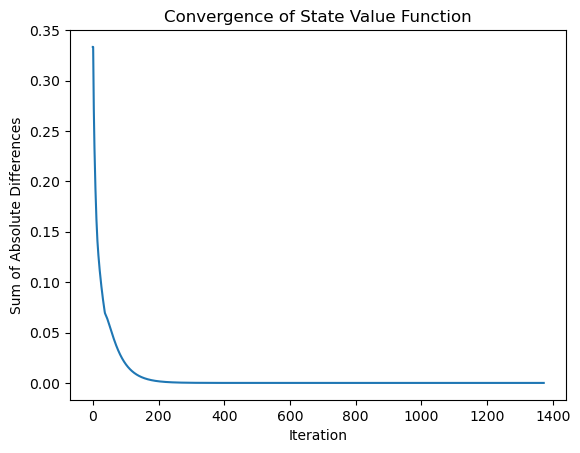

Optimal Value Function: [0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.
 0.52941176 0.         0.82352941 0.82352941 0.76470588 0.
 0.         0.88235294 0.94117647 0.        ]


In [15]:
# Plotting the convergence of the value function
plt.plot(convergence_diffs)
plt.xlabel('Iteration')
plt.ylabel('Sum of Absolute Differences')
plt.title('Convergence of State Value Function')
plt.show()

print("Optimal Value Function:", optimal_value_function)

# Evaluating the Performance

In [16]:
def evaluate_policy(policy, env, num_episodes=1000):
    total_reward = 0
    for _ in range(num_episodes):
        state = env.reset()
        done = False
        while not done:
            if isinstance(state, (list, tuple, str)):
                state = state[0]
            action = policy[state]
            next_state, reward, done, info, _ = env.step(action)
            state = next_state
            total_reward += reward
    return total_reward / num_episodes

average_reward = evaluate_policy(optimal_policy, env)
print(f'Average reward per episode: {average_reward}')

Average reward per episode: 0.801


### Discussion on Policy derived from Value Iteration

The performance of the policy derived from Value Iteration in the FrozenLake environment can be evaluated by observing the average reward per episode. A higher average reward indicates a more effective policy in navigating the environment towards the goal while avoiding penalties. The Value Iteration algorithm ensures that the policy is optimal in the sense that it maximizes the expected cumulative reward, given the current state of the environment. However, the effectiveness of the policy also depends on the specific characteristics of the environment, such as the layout of the lake and the distribution of rewards and penalties.